In [1]:
import os

# tf tools
import tensorflow as tf

# image processsing
from tensorflow.keras.preprocessing.image import (load_img,
                                                  img_to_array,
                                                  ImageDataGenerator)
# VGG16 model
from tensorflow.keras.applications.vgg16 import (preprocess_input,
                                                 decode_predictions,
                                                 VGG16)
# layers
from tensorflow.keras.layers import (Flatten, 
                                     Dense, 
                                     Dropout, 
                                     BatchNormalization)
# generic model object
from tensorflow.keras.models import Model

# optimizers
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.optimizers import SGD, Adam

#scikit-learn
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# for plotting
import numpy as np
import matplotlib.pyplot as plt

2024-04-25 12:47:20.011680: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-25 12:47:20.015468: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-25 12:47:20.068093: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-25 12:47:21.097547: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
filepath = os.path.join("..", "input", "Tobacco3482")

In [3]:
subfolders = os.listdir(filepath)
print(subfolders)

['Memo', 'Scientific', 'Resume', 'ADVE', 'Note', 'Email', 'Form', 'Letter', 'News', 'Report']


In [4]:
subfolders

['Memo',
 'Scientific',
 'Resume',
 'ADVE',
 'Note',
 'Email',
 'Form',
 'Letter',
 'News',
 'Report']

In [13]:
folder

'Report'

In [18]:
len(img)

3482

Thumbs.db ../input/Tobacco3482/Memo
Thumbs.db ../input/Tobacco3482/Scientific
Thumbs.db ../input/Tobacco3482/Resume
Thumbs.db ../input/Tobacco3482/ADVE
Thumbs.db ../input/Tobacco3482/Note
Thumbs.db ../input/Tobacco3482/Email
Thumbs.db ../input/Tobacco3482/Form
Thumbs.db ../input/Tobacco3482/Letter
Thumbs.db ../input/Tobacco3482/News
Thumbs.db ../input/Tobacco3482/Report


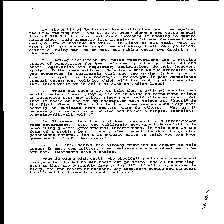

In [4]:
img = [] # collect all images in a list
labels = []
label = 0

#load data
for folder in subfolders:
    folderpath = os.path.join(filepath, folder)
    data = os.listdir(folderpath)
    for file in data:
        if file.endswith(".jpg"):
            imagepath = os.path.join(folderpath, file)
            image = load_img(imagepath, target_size=(224, 224))
            img.append(image) # add to the list for all images
            labels.append(label)
        else:
            # do nothing

    label += 1

image

In [5]:
img_array = np.array(img) # convert to array
preprocessed_img = preprocess_input(img_array) # preprocess the image for the VGG model

In [6]:
#finetune on our dataset 
#((X_train, y_train), (X_test, y_test)) = img

(X_train, X_test, y_train, y_test) = train_test_split(preprocessed_img,
                                                      labels, 
                                                      test_size=0.2)
X_train = X_train.astype("float") / 255.
X_test = X_test.astype("float") / 255.

In [7]:
# integers to one-hot vectors
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)
y_train.shape


(2785, 10)

In [8]:
# defining labels
labelnames = ['advertisement', 'email', 
            'form', 'letter', 
            'memo', 'news', 
            'note', 'report', 
            'resume', 'scientific paper']

In [18]:
del model
tf.keras.backend.clear_session()

In [19]:
# load model without classifier layers
model = VGG16(include_top=False, 
              pooling='max',
              input_shape=(224, 224, 3))

In [20]:
# mark loaded layers as not trainable
for layer in model.layers:
    layer.trainable = False

In [11]:
model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# add new classifier layers
flat1 = Flatten()(model.layers[-1].output) #take the model's last layer's output and flatten that
class1 = Dense(128, activation='relu')(flat1) # second set of brackets show which layer the current layer is being appended to
class2 = Dense(128, activation='relu')(class1) # <- was added manually
output = Dense(10, activation='softmax')(class2)

# define new model
model = Model(inputs=model.inputs, 
              outputs=output)
# summarize
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d            │ (None, 512)            │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 14,798,154 (56.45 MB)

 Trainable params: 83,466 (326.04 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [22]:
#optimization algorithm
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=10000,
    decay_rate=0.9)
sgd = SGD(learning_rate=lr_schedule)

In [23]:
# compile the model
model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
# train the model
H = model.fit(X_train, y_train, 
            validation_split=0.1,
            batch_size=128,
            epochs=10,
            verbose=1)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 81s 4s/step - accuracy: 0.1783 - loss: 2.2999 - val_accuracy: 0.2509 - val_loss: 2.1495
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 80s 4s/step - accuracy: 0.2748 - loss: 2.0959 - val_accuracy: 0.2724 - val_loss: 2.0665
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 80s 4s/step - accuracy: 0.3208 - loss: 2.0121 - val_accuracy: 0.3011 - val_loss: 1.9974
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 80s 4s/step - accuracy: 0.3734 - loss: 1.9388 - val_accuracy: 0.3692 - val_loss: 1.9372
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 80s 4s/step - accuracy: 0.4197 - loss: 1.8630 - val_accuracy: 0.3728 - val_loss: 1.8896
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 81s 4s/step - accuracy: 0.4514 - loss: 1.7899 - val_accuracy: 0.4158 - val_loss: 1.8213
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 81s 4s/step - accuracy: 0.4640 - loss: 1.7602 - val_accuracy: 0.4337 - val_loss: 1.7663
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 80s 4s/step - accuracy: 0.4980 - loss: 1.6854 - val_accuracy: 0.4122 - val_loss:

In [30]:
def plot_history(H, epochs):
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
    plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss", linestyle=":")
    plt.title("Loss curve")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.tight_layout()
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
    plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc", linestyle=":")
    plt.title("Accuracy curve")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.tight_layout()
    plt.legend()
    plt.show()

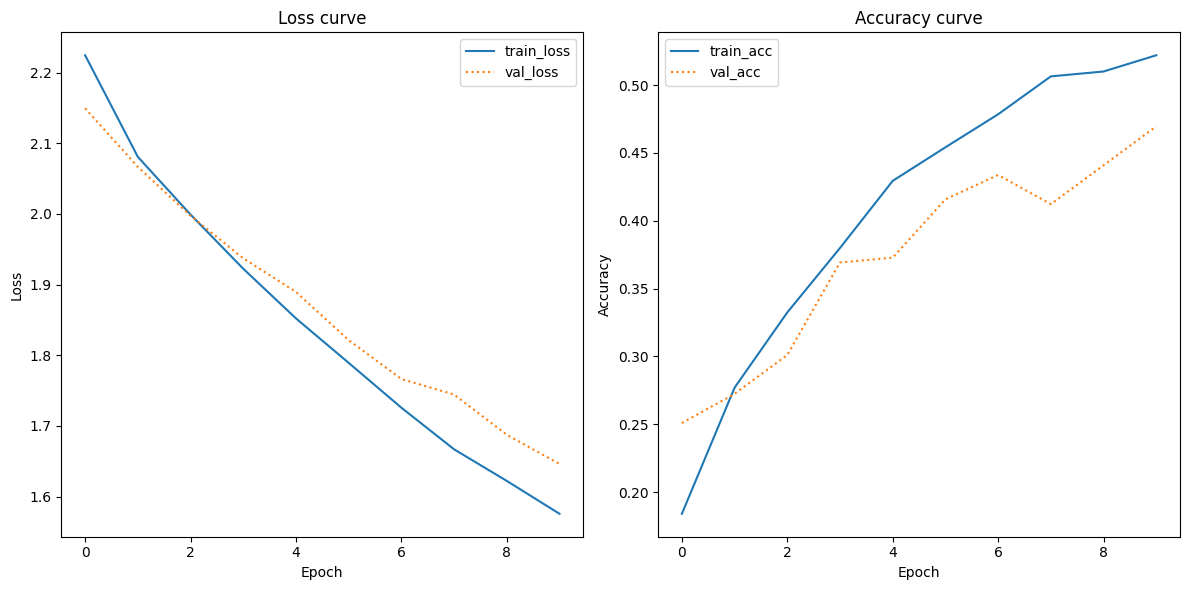

In [26]:
plot_history(H, 10)

In [27]:
# create classification report and learning curves
predictions = model.predict(X_test, batch_size=128)
classifier_metrics = classification_report(y_test.argmax(axis=1),
                            predictions.argmax(axis=1),
                            target_names=labelnames)
print(classifier_metrics)

# saving classification report as a .txt file
text_file = open(r'../output/classification_report2.txt', 'w')
text_file.write(classifier_metrics)
text_file.close()

6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step
                  precision    recall  f1-score   support

   advertisement       0.35      0.86      0.50       116
           email       1.00      0.04      0.07        55
            form       0.00      0.00      0.00        23
          letter       0.92      0.80      0.86        45
            memo       0.00      0.00      0.00        49
            news       0.76      0.72      0.74       127
            note       0.63      0.36      0.46        85
          report       0.37      0.58      0.45       111
          resume       0.89      0.71      0.79        35
scientific paper       0.00      0.00      0.00        51

        accuracy                           0.50       697
       macro avg       0.49      0.41      0.39       697
    weighted avg       0.52      0.50      0.45       697



/home/ucloud/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ucloud/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ucloud/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


for this result ^ i didnt run the block of code that marks layers as untrainable. is that ok?